In [ ]:
# K means

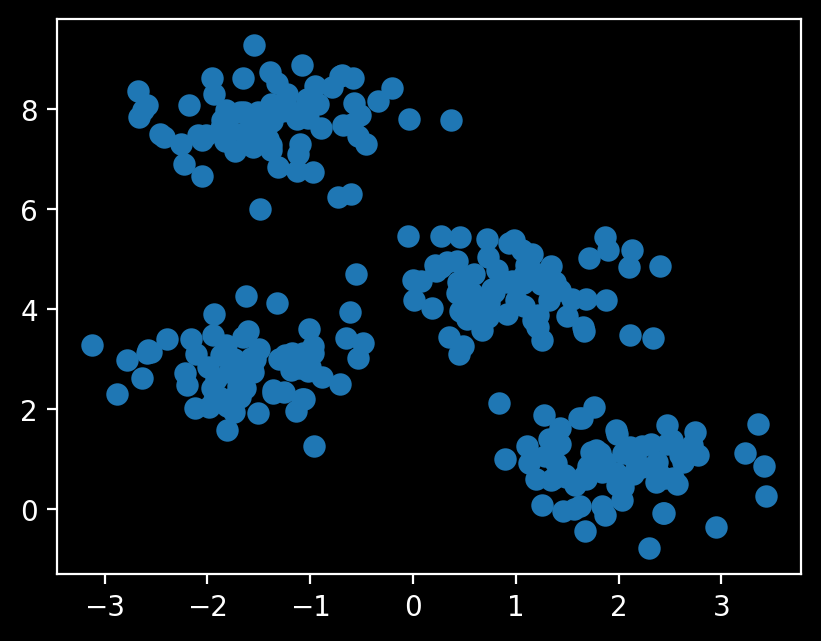

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=300, centers=4,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], s=50);

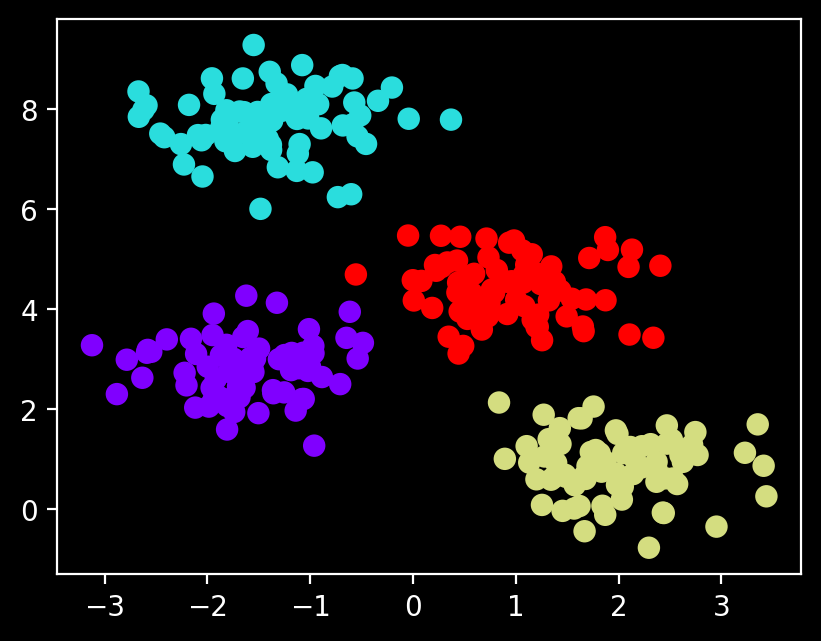

In [2]:
from sklearn.cluster import KMeans
est = KMeans(4)  # 4 clusters
est.fit(X)
y_kmeans = est.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow');

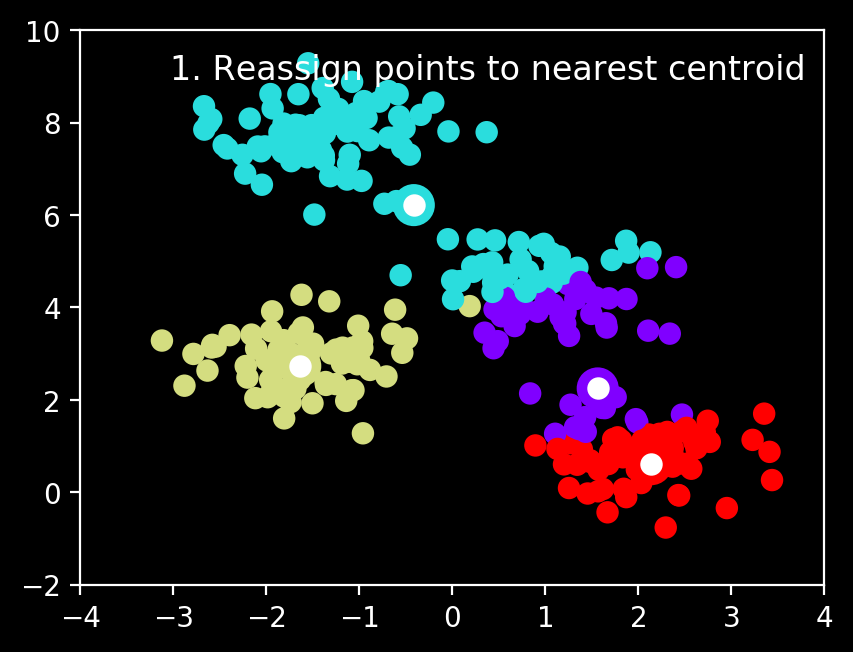

In [4]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
import warnings

def plot_kmeans_interactive_step(X, y, frame=0, n_clusters=4):
    from sklearn.metrics.pairwise import euclidean_distances
    rng = np.random.RandomState(2)
    labels = np.zeros(X.shape[0])
    centers = rng.randn(n_clusters, 2)
    nsteps = frame // 3
    # To make sure we dynamically respond to iPadOS themes, use text color as point color.
    p_color = np.array([plt.rcParams['text.color']])
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=RuntimeWarning)
        for i in range(nsteps + 1):
            old_centers = centers
            if i < nsteps or frame % 3 > 0:
                dist = euclidean_distances(X, centers)
                labels = dist.argmin(1)
            if i < nsteps or frame % 3 > 1:
                centers = np.array([X[labels == j].mean(0)
                                    for j in range(n_clusters)])
                nans = np.isnan(centers)
                centers[nans] = old_centers[nans]
        # plot the data and cluster centers
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='rainbow', vmin=0, vmax=n_clusters - 1);
        plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o', c=np.arange(n_clusters), s=200, cmap='rainbow')
        plt.scatter(old_centers[:, 0], old_centers[:, 1], marker='o', c=p_color, s=50)
        # plot new centers if third frame
        if frame % 3 == 2:
            for i in range(n_clusters):
                plt.annotate('', centers[i], old_centers[i], arrowprops=dict(arrowstyle='->', linewidth=1))
            plt.scatter(centers[:, 0], centers[:, 1], marker='o', c=np.arange(n_clusters), s=200, cmap='rainbow')
            plt.scatter(centers[:, 0], centers[:, 1], marker='o', c=p_color, s=50)
        plt.xlim(-4, 4)
        plt.ylim(-2, 10)
        if frame % 3 == 1:
            plt.text(3.8, 9.5, "1. Reassign points to nearest centroid", ha='right', va='top', size=12)
        elif frame % 3 == 2:
            plt.text(3.8, 9.5, "2. Update centroids to cluster means", ha='right', va='top', size=12)
        plt.show()
            
# Prepare sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
plot_kmeans_interactive_step(X, y, frame=10, n_clusters=4)

In [5]:
import ipywidgets as widgets
from sklearn.datasets import make_blobs
# Prepare sample data
X, y = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=0.60)
# Configure interactive widgets    
clusters_dropdown = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6], value=1, description='Number of clusters', style={'description_width': 'auto'})
slider = widgets.IntSlider(value=0, min=0, max=50, description="Frame", continuous_update=False)
play_button = widgets.Play(value=0, min=0, max=50, step=1, interval=1000, description="Press play")
widgets.jslink((play_button, "value"), (slider, "value"))
out = widgets.interactive_output(plot_kmeans_interactive_step, {'X': widgets.fixed(X), 'y': widgets.fixed(y), 'frame': slider, 'n_clusters': clusters_dropdown})
display(clusters_dropdown)
display(out)
display(widgets.HBox([play_button, slider]))

Dropdown(description='Number of clusters', options=(1, 2, 3, 4, 5, 6), style=DescriptionStyle(description_widt…

Output()

# clustering digits

In [6]:
from sklearn.datasets import load_digits
digits = load_digits()
est = KMeans(n_clusters=10)
clusters = est.fit_predict(digits.data)
est.cluster_centers_.shape

(10, 64)

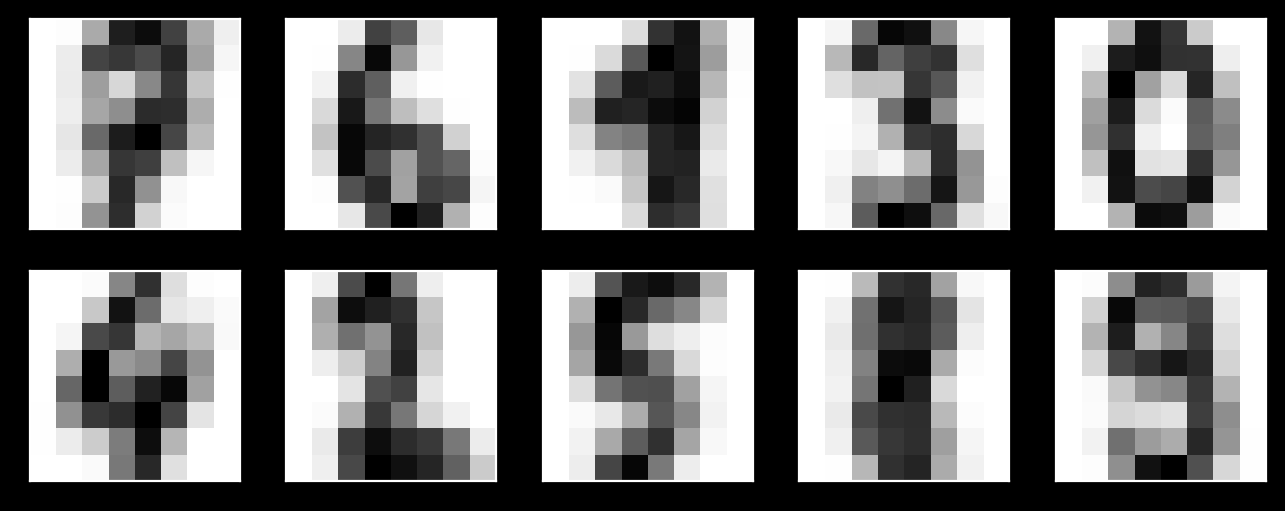

In [7]:
fig = plt.figure(figsize=(8, 3))
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    ax.imshow(est.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

In [8]:
from scipy.stats import mode
import numpy as np
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

For good measure, let's use our PCA visualization and look at the true cluster labels and k-means cluster labels:

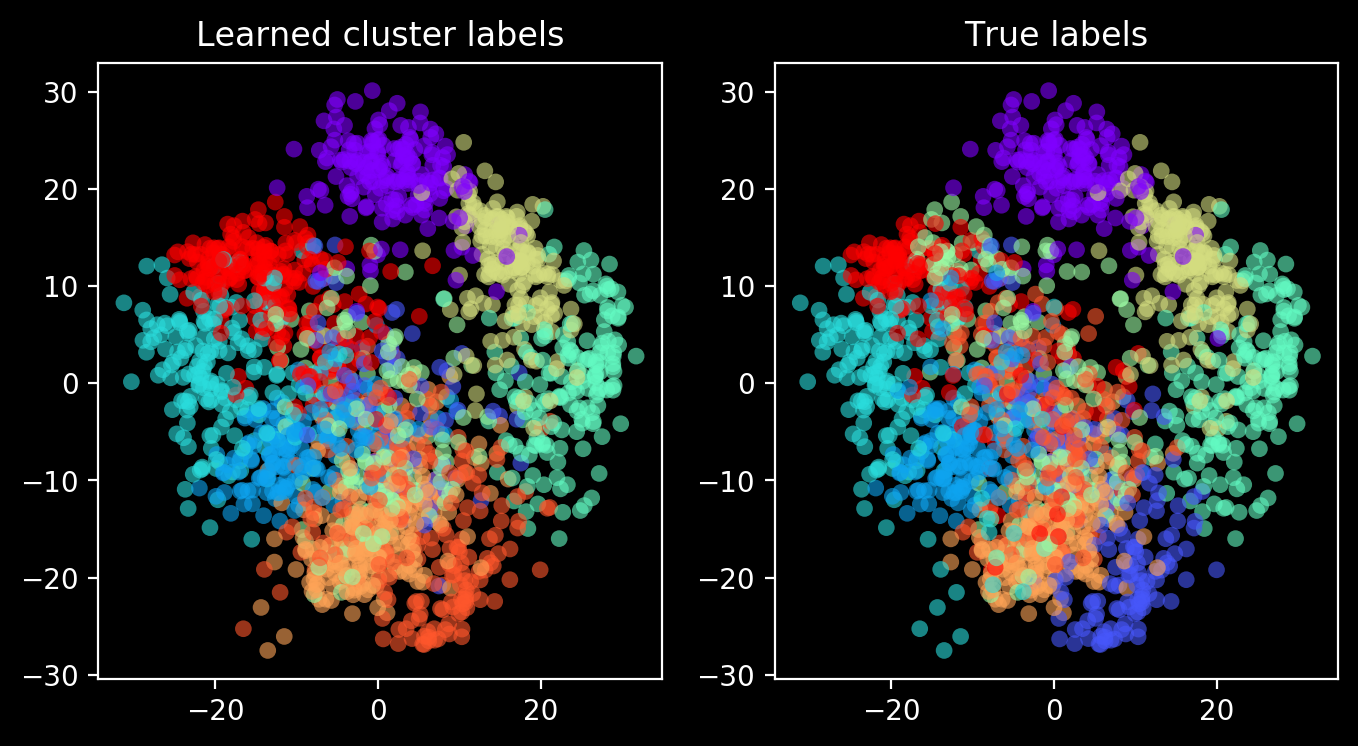

In [9]:
from sklearn.decomposition import PCA
X = PCA(2).fit_transform(digits.data)
# Plot learned cluster labels:
kwargs = dict(cmap = plt.cm.get_cmap('rainbow', 10), edgecolor='none', alpha=0.6)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].scatter(X[:, 0], X[:, 1], c=labels, **kwargs)
ax[0].set_title('Learned cluster labels')
# Plot 'true' labels:
ax[1].scatter(X[:, 0], X[:, 1], c=digits.target, **kwargs)
ax[1].set_title('True labels');

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

In [ ]:
from sklearn.metrics import confusion_matrix
plt.imshow(confusion_matrix(digits.target, labels), cmap='plasma', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.ylabel('True')
plt.xlabel('Predicted');